# Week 2 - Mixture models - Programming Exercise

### Construct a 2-component gaussian mixture model with two outputs $(x_1, x_2)$. Each component has the identity matrix as covariance matrix. The first has mean $(1,1)$. The other has mean $(2,3)$.  The mixing coefficients are both $1/2$. Plot samples from this density.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
Xa_mean = np.array([1,1])
Xb_mean = np.array([3,5])
pi = 1/2

In [3]:
def sample_gaussian_mixture(N = 10, pi = pi, Xa_mean = Xa_mean, Xb_mean = Xb_mean):
    N_Xa = np.random.binomial(n = N, p = pi, size=1)[0] # numbers to draw from Xa
    N_Xb = N - N_Xa
    Xa = np.random.normal(size = (N_Xa,2)) + Xa_mean
    Xb = np.random.normal(size = (N_Xb,2)) + Xb_mean
    return(np.concatenate((Xa, Xb), axis=0))

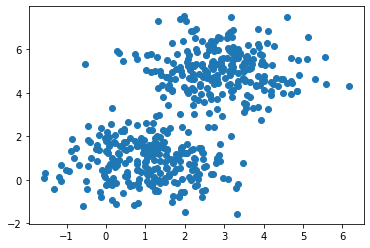

In [4]:
X = sample_gaussian_mixture(500)
plt.scatter(X[:,0], X[:,1])
plt.show()

### According to exercise 9.10 above, we know that the conditional, $p(x_2|x_1)$, is again a mixture model. Write a function that for a given $x_1$ plots the corresponding density over $x_2$.  Plot $p(x_2|x_1=2)$ and $p(x_2|x_1=3)$.

Define $p(x_2|x_1)$

In [12]:
def p_x2_given_x1(x2, x1, pi = pi, Xa_mean = Xa_mean, Xb_mean = Xb_mean, Sigma = np.eye(2)):
    # PDF of the two omponenets
    Xa_pdf = multivariate_normal(Xa_mean,Sigma)
    Xb_pdf = multivariate_normal(Xb_mean,Sigma)

    # PDF of the two omponenets' first axis
    Xa1_pdf = multivariate_normal(Xa_mean[0],1)
    Xb1_pdf = multivariate_normal(Xb_mean[0],1)
    
    # Equation from 9.10
    p1_x1 = pi*Xa1_pdf.pdf(x1) + (1-pi)*Xb1_pdf.pdf(x1) # normalization constant
    out = pi*Xa_pdf.pdf(np.array([x1,x2])) + (1-pi)*Xb_pdf.pdf(np.array([x1,x2]))
    out = out / p1_x1 # normalization
    return(out)

Generate data and calculate $p(x_2|x_1=2)$ and $p(x_2|x_1=3)$

In [13]:
x1_1 = 2
x1_2 = 3
x2_val = np.linspace(-3, 9, 1000)

p_x2_given_x1_is_2_val = [p_x2_given_x1(x2, x1_1) for x2 in x2_val]
x2_and_p_2 = np.transpose(np.vstack((x2_val, p_x2_given_x1_is_2_val)))

p_x2_given_x1_is_3_val = [p_x2_given_x1(x2, x1_2) for x2 in x2_val]
x2_and_p_3 = np.transpose(np.vstack((x2_val, x2_x1_3_val)))

Plot distributions

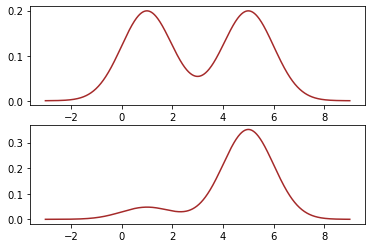

In [14]:
plt.subplot(2, 1, 1) # n is the position of your subplot (1 to 4)
plt.plot(x2_and_p_2[:,0], x2_and_p_2[:,1], c='brown')
plt.subplot(2, 1, 2) # n is the position of your subplot (1 to 4)
plt.plot(x2_and_p_3[:,0], x2_and_p_3[:,1], c='brown')
plt.show()

Plot distribution on top of data

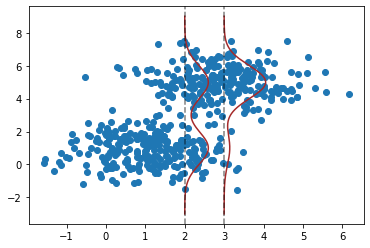

In [15]:
# Plot data
plt.scatter(X[:,0], X[:,1])

#Plot conditional distribution - scaled by 3
plt.plot(x2_and_p_2[:,1]*3+x1_1, x2_and_p_2[:,0], c='brown')
plt.axvline(x=x1_1, c='black', linestyle='--', alpha = 0.5)

#Plot conditional distribution - scaled by 3
plt.plot(x2_and_p_3[:,1]*3+x1_2, x2_and_p_3[:,0], c='brown')
plt.axvline(x=x1_2, c='black', linestyle='--', alpha = 0.5)

plt.show()

## Pyro

In [21]:
import torch
import pyro

In [74]:
def gmm(num_draws=1):
    # Mixture component probabilities
    p=torch.tensor([0.5, 0.5])
    # Means
    m=torch.tensor([[1., 1], [3, 5]])
    # Standard deviations
    s=torch.eye(2)
    # Number of samples
    with pyro.plate("gmm", num_draws): # plate makes each draw independent of each other
        c=pyro.sample("c", pyro.distributions.Categorical(p))
        x=pyro.sample("x", pyro.distributions.MultivariateNormal(m[c,:], s))
    return(x)

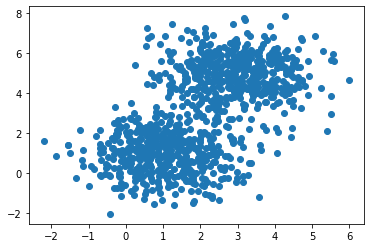

In [75]:
pyro_samples = gmm(1000)
plt.scatter(pyro_samples[:,0], pyro_samples[:,1])
plt.show()